In [14]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import os
import pandas as pd

# Check if the file exists
sp500 = pd.DataFrame()  # Define an empty DataFrame 'sp500'
data_path = 'D:\\project-walkthroughs\\sp_500\\sp500.csv' # Corect the path to the file

if os.path.exists(data_path):
    sp500 = pd.read_csv(data_path)
else:
    # Provide an alternative file path or handle the error accordingly
    print(f"File not found: '{data_path}'")
    # data_path = 'alternative_file_path.csv'

sp500 = sp500.loc["1990-01-01":].copy()


In [7]:

sp500 = sp500.apply(pd.to_numeric, errors='coerce')


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
data = pd.read_csv('D:\\project-walkthroughs\\sp_500\\sp500.csv')

# Rename columns to match the expected format (if necessary)
data.columns = [col.lower() for col in data.columns]

# Assuming 'NextClose' is the next day's close price, we need to create it
data['nextclose'] = data['close'].shift(-1)

predictors = ['open', 'high', 'low', 'volume']
target = 'nextclose'

# Check if necessary columns exist
if set(predictors + [target]).issubset(data.columns):
    # Fill any remaining missing values
    data = data.dropna(subset=predictors + [target])
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.2, random_state=42)
    
    # Define and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # You can now use model.predict() to make predictions on new data
    print("Model training completed successfully.")
else:
    print("Error: Required columns not found in the dataframe.")

Model training completed successfully.


In [9]:
import pandas as pd
import numpy as np

# Create a sample dataset for 2024
dates_2024 = pd.date_range(start="2024-01-01", end="2024-12-31", freq='B')  # Business days in 2024
n = len(dates_2024)

# Generate random data for features (for demonstration purposes)
np.random.seed(42)
data_2024 = {
    "Open": np.random.uniform(low=3500, high=4500, size=n),
    "High": np.random.uniform(low=3500, high=4500, size=n),
    "Low": np.random.uniform(low=3500, high=4500, size=n),
    "Close": np.random.uniform(low=3500, high=4500, size=n),
    "Volume": np.random.uniform(low=1e6, high=1e8, size=n)
}

# Create a DataFrame for 2024 data
sp500_2024 = pd.DataFrame(data_2024, index=dates_2024)

# Convert column names to lowercase
sp500_2024.columns = sp500_2024.columns.str.lower()

# Assuming 'predictors' is defined somewhere in the code and contains the correct column names in lowercase
# Check if necessary columns exist
if set(predictors).issubset(sp500_2024.columns):
    # Use the trained model to make predictions for 2024
    predictions_2024 = model.predict(sp500_2024[predictors])

    # Add predictions to the DataFrame
    sp500_2024["Predictions"] = predictions_2024


# Display the first few rows of the DataFrame
sp500_2024.head()

,open,high,low,close,volume,Predictions
2024-01-01,3874.540119,3640.084015,4338.328705,4083.391795,8.713979e+07,3823.166038
2024-01-02,4450.714306,4018.329652,3968.693160,3900.851417,3.105672e+06,4009.282656
2024-01-03,4231.993942,4377.373072,3914.819502,3962.005804,8.759547e+07,4240.612571
2024-01-04,4098.658484,4240.768618,3773.407072,4447.283340,5.336478e+07,4103.206713
2024-01-05,3656.018640,4197.015741,3556.375497,3653.351403,9.396770e+07,4001.536156


Mean Absolute Error: 22.00110040555718


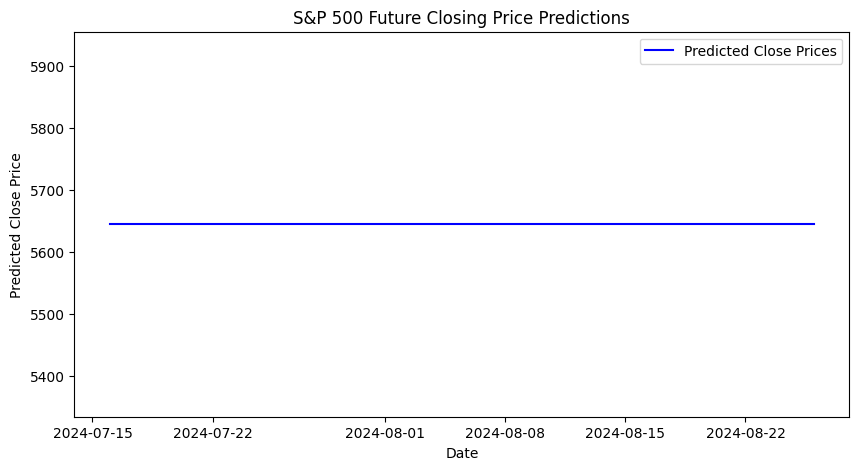

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the data
file_path = 'D:\\project-walkthroughs\\sp_500\\sp500.csv'
sp500_data = pd.read_csv(file_path)

# Parse the date column
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], format='%d/%m/%Y')

# Sort data by date
sp500_data = sp500_data.sort_values(by='Date')

# Fill missing values if any using recommended methods
sp500_data.ffill(inplace=True)
sp500_data.bfill(inplace=True)

# Convert columns from string to float and remove commas, only if they are of string type
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    if sp500_data[col].dtype == 'object':
        sp500_data[col] = sp500_data[col].str.replace(',', '').astype(float)

# Check if all required columns are present and not empty
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in required_columns:
    if col not in sp500_data.columns or sp500_data[col].isnull().any():
        raise ValueError(f"Required column '{col}' not found or contains null values.")

# Create features and target variable
X = sp500_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = sp500_data['Close'].shift(-1)  # Predicting next day's close price
y.ffill(inplace=True)  # Fill missing values in target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Predict future prices
future_dates = pd.date_range(start=sp500_data['Date'].max(), periods=30, freq='B')  # Next 30 business days
future_data = pd.DataFrame(index=future_dates, columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# Assuming we take the last available values for the features to predict future close prices
last_row = sp500_data.iloc[-1][['Open', 'High', 'Low', 'Close', 'Volume']]

for column in future_data.columns:
    future_data[column] = last_row[column]

future_predictions = model.predict(future_data)

# Plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(future_dates, future_predictions, label='Predicted Close Prices', color='blue')
plt.title('S&P 500 Future Closing Price Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.show()